In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# datasets
transforms = transforms.Compose([
    transforms.Grayscale(),                    # Convert to grayscale
    transforms.Resize((28, 28)),               # Resize to 28x28
    transforms.ToTensor(),                     # Convert to tensor and normalize
])

trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transforms)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transforms)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# For single FC NN
Input 784 x 1 \
Hidden layer: W 1024 x 784, b 1024 x 1 \
Output 10 x 1

# For 2 FC NN
Input 784 x 1 \
Hidden layer 1: W1 1024 x 784, b1 1024 x 1 \
Hidden layer 2: W2 1024 x 1024, b2 1024 x 1 \
Output layer W3 10 x 1024, b3 10 x 1

# Q2

In [ ]:
# Model with 1 Fully Connected Layer
class SingleFCLayer(nn.Module):
    def __init__(self):
        super(SingleFCLayer, self).__init__()
        self.fc1 = nn.Linear(784, 1024)  # Input -> Hidden
        self.fc2 = nn.Linear(1024, 10)  # Hidden -> Output

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten 28x28 input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Training and Evaluation Function
def train_and_evaluate(model, batch_size, learning_rate, activation, epochs, trainset, testset):
    # dataloaders
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


    # Initialize Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        # Training phase
        model.train()
        correct_train = 0
        total_train = 0
        train_loss = 0

        for inputs, labels in trainloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track accuracy
            _, predicted = outputs.max(1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            train_loss += loss.item()

        train_accuracy = correct_train / total_train * 100

        # Validation/Test phase
        model.eval()
        correct_test = 0
        total_test = 0
        test_loss = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Track accuracy
                _, predicted = outputs.max(1)
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)
                test_loss += loss.item()

        test_accuracy = correct_test / total_test * 100

        print(f"Epoch {epoch+1}:",
              f"Train Accuracy: {train_accuracy:.2f}% | Test Accuracy: {test_accuracy:.2f}%",
              f"Train Loss: {train_loss / len(trainloader):.4f} | Test Loss: {test_loss / len(testloader):.4f}")

    print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}, Activation: {activation}, Final Train Accuracy: {train_accuracy:.2f}%, Final Test Accuracy: {test_accuracy:.2f}%")

    return model, train_accuracy, test_accuracy

In [ ]:
# Define hyperparameters
learning_rate = 0.001
momentum = 0
batch_size = 30
epochs = 30
activation = 'relu' # Can be 'relu' or 'sigmoid'

# Initialize Model, Loss, and Optimizer
model = SingleFCLayer()

# Call the training and evaluation function
model, train_accuracy, test_accuracy = train_and_evaluate(model, batch_size, learning_rate, activation, epochs, trainset, testset)

Epoch 1: Train Accuracy: 58.42% | Test Accuracy: 65.38% Train Loss: 1.6754 | Test Loss: 1.2383
Epoch 2: Train Accuracy: 68.12% | Test Accuracy: 68.85% Train Loss: 1.0464 | Test Loss: 0.9344
Epoch 3: Train Accuracy: 72.05% | Test Accuracy: 72.47% Train Loss: 0.8548 | Test Loss: 0.8155
Epoch 4: Train Accuracy: 74.69% | Test Accuracy: 74.69% Train Loss: 0.7651 | Test Loss: 0.7504
Epoch 5: Train Accuracy: 76.53% | Test Accuracy: 76.00% Train Loss: 0.7088 | Test Loss: 0.7035
Epoch 6: Train Accuracy: 77.96% | Test Accuracy: 77.37% Train Loss: 0.6681 | Test Loss: 0.6688
Epoch 7: Train Accuracy: 79.03% | Test Accuracy: 78.14% Train Loss: 0.6367 | Test Loss: 0.6423
Epoch 8: Train Accuracy: 80.02% | Test Accuracy: 78.73% Train Loss: 0.6119 | Test Loss: 0.6198
Epoch 9: Train Accuracy: 80.53% | Test Accuracy: 79.55% Train Loss: 0.5912 | Test Loss: 0.6020
Epoch 10: Train Accuracy: 81.03% | Test Accuracy: 80.03% Train Loss: 0.5742 | Test Loss: 0.5876
Epoch 11: Train Accuracy: 81.52% | Test Accuracy:

In [ ]:
# Model with 2 Fully Connected Layers
class TwoFCLayers(nn.Module):
    def __init__(self):
        super(TwoFCLayers, self).__init__()
        self.fc1 = nn.Linear(784, 1024)  # Input -> Hidden1
        self.fc2 = nn.Linear(1024, 1024)  # Hidden1 -> Hidden2
        self.fc3 = nn.Linear(1024, 10)  # Hidden2 -> Output

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten 28x28 input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Define hyperparameters
learning_rate = 0.001
momentum = 0
batch_size = 30
epochs = 30
activation = 'relu' # Can be 'relu' or 'sigmoid'

# Initialize Model
model = TwoFCLayers()

# Call the training and evaluation function
model, train_accuracy, test_accuracy = train_and_evaluate(model, batch_size, learning_rate, activation, epochs, trainset, testset)

Epoch 1: Train Accuracy: 49.76% | Test Accuracy: 57.42% Train Loss: 2.0553 | Test Loss: 1.7102
Epoch 2: Train Accuracy: 63.85% | Test Accuracy: 65.23% Train Loss: 1.3517 | Test Loss: 1.1073
Epoch 3: Train Accuracy: 67.57% | Test Accuracy: 67.78% Train Loss: 0.9753 | Test Loss: 0.8968
Epoch 4: Train Accuracy: 70.90% | Test Accuracy: 70.50% Train Loss: 0.8283 | Test Loss: 0.7974
Epoch 5: Train Accuracy: 73.64% | Test Accuracy: 73.69% Train Loss: 0.7503 | Test Loss: 0.7374
Epoch 6: Train Accuracy: 75.80% | Test Accuracy: 75.57% Train Loss: 0.6977 | Test Loss: 0.6922
Epoch 7: Train Accuracy: 77.51% | Test Accuracy: 77.43% Train Loss: 0.6573 | Test Loss: 0.6575
Epoch 8: Train Accuracy: 78.90% | Test Accuracy: 77.85% Train Loss: 0.6245 | Test Loss: 0.6302
Epoch 9: Train Accuracy: 79.88% | Test Accuracy: 79.21% Train Loss: 0.5974 | Test Loss: 0.6044
Epoch 10: Train Accuracy: 80.58% | Test Accuracy: 79.59% Train Loss: 0.5749 | Test Loss: 0.5854
Epoch 11: Train Accuracy: 81.23% | Test Accuracy:

# Q3

In [ ]:
# Model with 2 Fully Connected Layers, Flexible Activation Choices
class TwoFCLayersWithFlexibleActivation(TwoFCLayers):
    def __init__(self, activation='relu'):
        super().__init__()  # Initialize the base class
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten 28x28 input
        if self.activation == 'relu':
            act_fn = torch.relu
        elif self.activation == 'sigmoid':
            act_fn = torch.sigmoid
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")
        x = act_fn(self.fc1(x))
        x = act_fn(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Define hyperparameters
batch_size = 10
learning_rate = 0.1
activation = 'sigmoid'  # Can be 'relu' or 'sigmoid'
epochs = 20

# Initialize Model, Loss, and Optimizer
model = TwoFCLayersWithFlexibleActivation(activation=activation)

# Call the training and evaluation function
model, train_accuracy, test_accuracy = train_and_evaluate(model, batch_size, learning_rate, activation, epochs, trainset, testset)

Epoch 1: Train Accuracy: 64.49% | Test Accuracy: 77.38% Train Loss: 0.9170 | Test Loss: 0.6033
Epoch 2: Train Accuracy: 80.27% | Test Accuracy: 81.99% Train Loss: 0.5353 | Test Loss: 0.5042
Epoch 3: Train Accuracy: 82.94% | Test Accuracy: 83.65% Train Loss: 0.4691 | Test Loss: 0.4567
Epoch 4: Train Accuracy: 84.19% | Test Accuracy: 82.05% Train Loss: 0.4353 | Test Loss: 0.4819
Epoch 5: Train Accuracy: 84.95% | Test Accuracy: 83.50% Train Loss: 0.4106 | Test Loss: 0.4393
Epoch 6: Train Accuracy: 85.69% | Test Accuracy: 85.05% Train Loss: 0.3933 | Test Loss: 0.4089
Epoch 7: Train Accuracy: 86.11% | Test Accuracy: 84.55% Train Loss: 0.3785 | Test Loss: 0.4414
Epoch 8: Train Accuracy: 86.55% | Test Accuracy: 84.76% Train Loss: 0.3669 | Test Loss: 0.4138
Epoch 9: Train Accuracy: 86.88% | Test Accuracy: 84.95% Train Loss: 0.3560 | Test Loss: 0.4041
Epoch 10: Train Accuracy: 87.21% | Test Accuracy: 86.13% Train Loss: 0.3465 | Test Loss: 0.3841
Epoch 11: Train Accuracy: 87.52% | Test Accuracy:

In [ ]:
# Save the model for Q5
torch.save(model.state_dict(), 'best_model_parameter.pth')

Q4 a Pollute the trainset

In [ ]:
# Check the balance of the trainset before the pollution
import numpy as np
from copy import deepcopy
from torch.utils.data import DataLoader, Dataset

# Group the training data by class
num_classes = 10  # Our data has 10 classes
training_data = {class_label: [] for class_label in range(num_classes)}

# Organize images by class
for image, label in trainset:
    training_data[label].append((image, label))  # Store as (image, label) tuples

# Verify initial class sizes before pollution
for class_label in range(num_classes):
    print(f"Class {class_label} has {len(training_data[class_label])} images before pollution.")

Class 0 has 6000 images before pollution.
Class 1 has 6000 images before pollution.
Class 2 has 6000 images before pollution.
Class 3 has 6000 images before pollution.
Class 4 has 6000 images before pollution.
Class 5 has 6000 images before pollution.
Class 6 has 6000 images before pollution.
Class 7 has 6000 images before pollution.
Class 8 has 6000 images before pollution.
Class 9 has 6000 images before pollution.


In [ ]:
# Pollute the dataset and check the balance of the polluted dataset
# Deep copy the training data for pollution
polluted_data = deepcopy(training_data)

# Prepare the final balanced dataset
balanced_data = {class_label: [] for class_label in range(num_classes)}

pollution_count = 540
for class_label in range(num_classes):
    # Randomly sample 540 images to pollute and remove them
    sampled_indices = np.random.choice(len(polluted_data[class_label]), pollution_count, replace=False)
    polluted_images = [polluted_data[class_label][idx] for idx in sampled_indices]
    remaining_images = [polluted_data[class_label][idx] for idx in range(len(polluted_data[class_label])) if idx not in sampled_indices]

    # Evenly distribute polluted images across other classes
    pollution_targets = [x for x in range(num_classes) if x != class_label]
    target_distribution = {target: [] for target in pollution_targets}

    for i, (image, _) in enumerate(polluted_images):
        target_class = pollution_targets[i % len(pollution_targets)]
        target_distribution[target_class].append((image, target_class))

    # Add polluted images to their target classes
    for target_class, polluted_set in target_distribution.items():
        balanced_data[target_class].extend(polluted_set)

    # Add the remaining unpolluted images (5460) to the current class
    balanced_data[class_label].extend(remaining_images)

# Flatten the balanced data into a single dataset
flattened_polluted_data = []
for class_label, items in balanced_data.items():
    flattened_polluted_data.extend(items)

# Verify the class sizes after balancing
for class_label in range(num_classes):
    count = sum(1 for _, label in flattened_polluted_data if label == class_label)
    print(f"Class {class_label} has {count} images after balancing.")

Class 0 has 6000 images after balancing.
Class 1 has 6000 images after balancing.
Class 2 has 6000 images after balancing.
Class 3 has 6000 images after balancing.
Class 4 has 6000 images after balancing.
Class 5 has 6000 images after balancing.
Class 6 has 6000 images after balancing.
Class 7 has 6000 images after balancing.
Class 8 has 6000 images after balancing.
Class 9 has 6000 images after balancing.


Q4 b

The best set of parameters from Q3 experiemnts is: batch size 10, learning rate 0.01, momentum 0, 30 epochs, and ReLU activation

In [ ]:
# For the balanced polluted data
class PollutedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        return image, label

In [ ]:
polluted_trainset = PollutedDataset(flattened_polluted_data)

# Train the 2FC NN model using polluted data
# Define hyperparameters
batch_size = 10
learning_rate = 0.1
activation = 'sigmoid'  # Can be 'relu' or 'sigmoid'
epochs = 20

# Initialize the model
model = TwoFCLayersWithFlexibleActivation(activation=activation)

# Train and evaluate
model, train_accuracy, test_accuracy = train_and_evaluate(model, batch_size, learning_rate, activation, epochs, polluted_trainset, testset)

Epoch 1: Train Accuracy: 57.03% | Test Accuracy: 75.71% Train Loss: 1.3205 | Test Loss: 0.7065
Epoch 2: Train Accuracy: 72.43% | Test Accuracy: 80.59% Train Loss: 0.9565 | Test Loss: 0.6124
Epoch 3: Train Accuracy: 75.11% | Test Accuracy: 81.77% Train Loss: 0.8955 | Test Loss: 0.5938
Epoch 4: Train Accuracy: 76.31% | Test Accuracy: 83.54% Train Loss: 0.8659 | Test Loss: 0.5204
Epoch 5: Train Accuracy: 76.86% | Test Accuracy: 83.94% Train Loss: 0.8475 | Test Loss: 0.5138
Epoch 6: Train Accuracy: 77.48% | Test Accuracy: 83.24% Train Loss: 0.8326 | Test Loss: 0.5198
Epoch 7: Train Accuracy: 78.00% | Test Accuracy: 83.25% Train Loss: 0.8209 | Test Loss: 0.5457
Epoch 8: Train Accuracy: 78.35% | Test Accuracy: 85.00% Train Loss: 0.8121 | Test Loss: 0.4771
Epoch 9: Train Accuracy: 78.49% | Test Accuracy: 85.04% Train Loss: 0.8039 | Test Loss: 0.4815
Epoch 10: Train Accuracy: 78.89% | Test Accuracy: 83.58% Train Loss: 0.7964 | Test Loss: 0.5080
Epoch 11: Train Accuracy: 79.20% | Test Accuracy:

Q5

Shift to right by 2 pixels

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Define the function to circularly shift an image right by 2 pixels
def circular_shift_right(image, shift=2):
    # Convert the image to a NumPy array for easy slicing
    image = image.numpy()
    shifted_image = np.zeros_like(image)  # Create a placeholder for the shifted image
    for i in range(image.shape[0]):  # Loop through rows
        # Perform the circular shift
        shifted_image[i] = np.concatenate((image[i, -shift:], image[i, :-shift]))
    return torch.tensor(shifted_image)

# Load the trained model with best parameter set in Q3
model.load_state_dict(torch.load('best_model_parameter.pth'))
model.eval()  # Set the model to evaluation mode

# Evaluate the model on circularly shifted images
correct = 0
total = 0

testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

with torch.no_grad():
    for images, labels in testloader:
        shifted_images = torch.stack([circular_shift_right(img.squeeze()) for img in images])  # Shift all batch images
        shifted_images = shifted_images.unsqueeze(1)  # Add a channel dimension
        outputs = model(shifted_images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate classification accuracy
accuracy = correct / total * 100
print(f'Classification Accuracy after circular shift: {accuracy:.2f}%')

Classification Accuracy after circular shift: 49.94%


Shift to down by 2 pixels

In [ ]:
import torch
import numpy as np

# Define the function to circularly shift an image down by 2 pixels
def circular_shift_down(image, shift=2):
    image = image.numpy()
    shifted_image = np.zeros_like(image)
    shifted_image[shift:, :] = image[:-shift, :]  # Move the upper part down
    shifted_image[:shift, :] = image[-shift:, :]  # Wrap the bottom part to the top
    return torch.tensor(shifted_image)


# Load the trained model with best parameter set in Q3
model.load_state_dict(torch.load('best_model_parameter.pth'))
model.eval()  # Set the model to evaluation mode

# Evaluate the model on circularly shifted images
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        shifted_images = torch.stack([circular_shift_down(img.squeeze()) for img in images])  # Shift all batch images
        shifted_images = shifted_images.unsqueeze(1)  # Add a channel dimension
        outputs = model(shifted_images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate classification accuracy
accuracy = correct / total * 100
print(f'Classification Accuracy after circular shift: {accuracy:.2f}%')

Classification Accuracy after circular shift: 67.06%


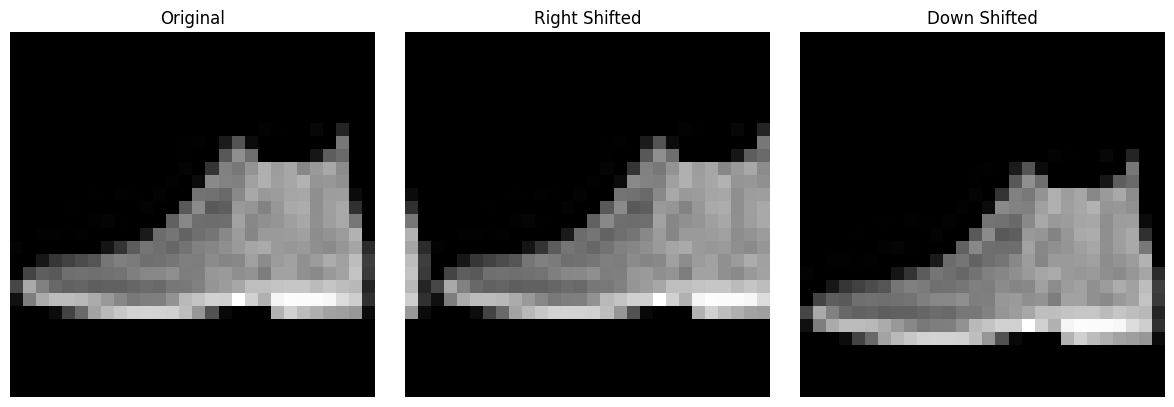

In [ ]:
# Double check if images shifted correctly
import matplotlib.pyplot as plt

# Extract the first image and label from the test loader
images, labels = next(iter(testloader))
original_image = images[0].squeeze()  # Get the first image and remove channel dimension

# Apply the shift functions
right_shifted_image = circular_shift_right(original_image, shift=2)
down_shifted_image = circular_shift_down(original_image, shift=2)

# Define a helper function to visualize the images
def show_images(original, right_shifted, down_shifted):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    titles = ["Original", "Right Shifted", "Down Shifted"]
    images = [original, right_shifted, down_shifted]

    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img.numpy(), cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the original and shifted images
show_images(original_image, right_shifted_image, down_shifted_image)

Q6
Took this photo with iPhone 13, and switched from .HEIC to .JPG using a converter.

![shirt.jpg](attachment:shirt.jpg)

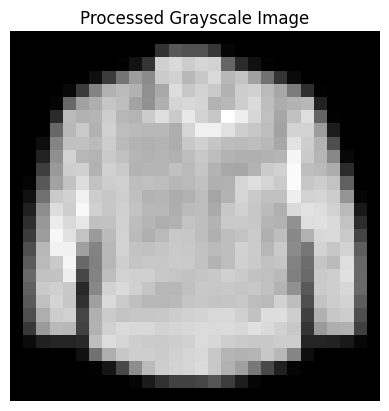

Predicted Class: 6
Class Probabilities: [0.02345973253250122, 0.0007377225556410849, 0.35974928736686707, 0.004515283741056919, 0.034889448434114456, 2.1722609744756483e-05, 0.5473917126655579, 8.415467078748406e-08, 0.029218802228569984, 1.6260595657513477e-05]


In [ ]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Load the saved model
# model = TwoFCLayersWithFlexibleActivation(activation='relu')
model.load_state_dict(torch.load('best_model_parameter.pth'))
model.eval()

# Define the transformations
transform = transforms.Compose([
    transforms.Grayscale(),                    # Convert to grayscale
    transforms.Resize((28, 28)),               # Resize to 28x28
    transforms.ToTensor(),                     # Convert to tensor and normalize
])

# Load and process the image
image_path = 'shirt.jpg'  # Replace with your image path
image = Image.open(image_path)

# Convert the image to grayscale and invert colors
# Origianlly the image I took has white background and pants color is black,
# but I found that the training dataset's examples are having black background and white garment.
image = ImageOps.grayscale(image)  # Convert to grayscale
image = ImageOps.invert(image)     # Invert colors


# Apply transformations
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the preprocessed image
processed_image = transforms.ToPILImage()(image_tensor.squeeze(0))  # Convert tensor to PIL Image
plt.imshow(processed_image, cmap="gray")  # Display as grayscale image
plt.title("Processed Grayscale Image")
plt.axis("off")
plt.show()

# Classify the image
with torch.no_grad():
    outputs = model(image_tensor)
    probabilities = torch.softmax(outputs, dim=1)  # Convert to probabilities
    predicted_class = torch.argmax(probabilities, dim=1).item()

# Print the results
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {probabilities.squeeze().tolist()}")


In [ ]:
import tarfile
import shutil

notebook_filename = '/content/drive/My Drive/Colab Notebooks/CS540 Programming Assignment #1 - Saeah Go.ipynb'

# Create a .tar.gz archive
with tarfile.open('saeah_go_hw1.tar.gz', 'w:gz') as tar:
    tar.add(notebook_filename)

# Optionally, you can move the created archive to a specific directory
shutil.move('saeah_go_hw1.tar.gz', '/content/drive/My Drive/')

'/content/drive/My Drive/saeah_go_hw1.tar.gz'

In [ ]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/'))


['Numpy_tutorial.ipynb', 'MTH371 - HW 1 Draft 1', 'HW2_raw01312022.ipynb', 'HW2_raw.ipynb', 'Networkx_walkthrough_new(1)-1.ipynb', 'MTH371 Saeah Go HW #2.ipynb', '(Python) Water Quality - open shapefile.ipynb', '(R) Water Quality.ipynb', 'Copy of hw4_with_guide.ipynb', 'CS445 HW#1 Q11 (Perceptron with MNIST).ipynb', 'Copy of CS445 HW#1 Q11 (Perceptron with MNIST).ipynb', 'Correct Ver CS445 HW#1 Q11 (Perceptron with MNIST).ipynb', 'Draft 3 CS445 Programming 1-incorrect.ipynb', 'Draft 2 CS445 Programming 1.ipynb', 'Draft 4 CS445 Programming 1.ipynb', 'Draft 5 CS445 Programming 1 - For Experiment 3.ipynb', 'Copy of Program#1 Yifan.ipynb', 'Gradient Descent (GD) Algorithm.ipynb', 'Draft 6 CS445 Programming 1.ipynb', 'Untitled0.ipynb', 'Programming 2 Draft1.ipynb', 'Hw1_notebook (1).ipynb', 'Spectral Clustering, K-means Clustering.ipynb', "Implementation of Luby's Algorithm.ipynb", 'Copy of K-Means Clustering (Program 3).ipynb', 'K-Means Clustering (Program 3).ipynb', 'Untitled (2)', 'Hw1_n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
